<a href="https://colab.research.google.com/github/LeraDoroshenko/mn/blob/main/%D0%BB%D0%B0%D0%B12_2_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Завдання 2. Завантажити датасет Титанік з Kaggle (або використовуйте вже завантажений файл titanic.csv)
Виконати попередній аналіз даних.**

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/titanic (2).csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


**1. Вивести перших 5 рядків.**

In [2]:
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


**2. Визначити розмір датасета.**

In [3]:
print(df.shape)

(418, 12)


**3. Визначити тип даних.**

In [4]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**4. Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.**

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


**6. Перевірити наявність дублікатів. При наявності видалити дублікати.**

In [8]:
duplicates = df.duplicated().sum()
print("Кількість дублікатів:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Дублікати видалено.")

Кількість дублікатів: 0


**7. Вивести описову статистику датасету describe()**

In [9]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


**8. Видалити стовпчик Cabin**

In [10]:
df.drop(columns=['Cabin'], inplace=True)

**9. Сформувати датасет з обраними стовпцями: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]**

In [11]:
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

**10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).**

In [12]:
df_selected = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})
print(df_selected.head())
print("Унікальні значення стовпця 'Sex':", df_selected['Sex'].unique())
df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})

   Survived  Pclass Sex   Age     Fare
0         0       3   0  34.5   7.8292
1         1       3   1  47.0   7.0000
2         0       2   0  62.0   9.6875
3         0       3   0  27.0   8.6625
4         1       3   1  22.0  12.2875
Унікальні значення стовпця 'Sex': [0 1]


**11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).**

In [13]:
print(df_selected.isna().sum())

Survived      0
Pclass        0
Sex         418
Age           0
Fare          0
dtype: int64


**12.Вивести 5 перших рядків датасету.**
**13.Вивести 5 останніх рядків датасету.**

In [14]:
print(df_selected.head())
print(df_selected.tail())

   Survived  Pclass  Sex   Age     Fare
0         0       3  NaN  34.5   7.8292
1         1       3  NaN  47.0   7.0000
2         0       2  NaN  62.0   9.6875
3         0       3  NaN  27.0   8.6625
4         1       3  NaN  22.0  12.2875
     Survived  Pclass  Sex       Age      Fare
413         0       3  NaN  30.27259    8.0500
414         1       1  NaN  39.00000  108.9000
415         0       3  NaN  38.50000    7.2500
416         0       3  NaN  30.27259    8.0500
417         0       3  NaN  30.27259   22.3583


**14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі.**


In [15]:
survival_rate_by_sex = df_selected.groupby('Sex')['Survived'].mean()
print(survival_rate_by_sex)

Series([], Name: Survived, dtype: float64)


**15.Обчисліть відсоток виживання для кожного класу (Pclass).**

In [16]:
survival_rate_by_class = df_selected.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


**16. Визначте середній вік тих, хто вижив, і тих, хто не вижив.**

In [17]:
avg_age_by_survival = df_selected.groupby('Survived')['Age'].mean()
print(avg_age_by_survival)

Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


**17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи.**

In [18]:
fare_bins = pd.qcut(df_selected['Fare'], 4)
survival_by_fare = df_selected.groupby(fare_bins, observed=True)['Survived'].mean() * 100
print(survival_by_fare)

Fare
(-0.001, 7.896]    26.315789
(7.896, 14.454]    27.083333
(14.454, 31.5]     39.047619
(31.5, 512.329]    53.398058
Name: Survived, dtype: float64


**18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass).**

In [19]:
avg_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()
print(avg_fare_by_class)

Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


**19. Обчисліть середній вік пасажирів для кожного класу (Pclass).**

In [ ]:
avg_age_by_class = df_selected.groupby('Pclass')['Age'].mean()
print(avg_age_by_class)

**20.Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив.**

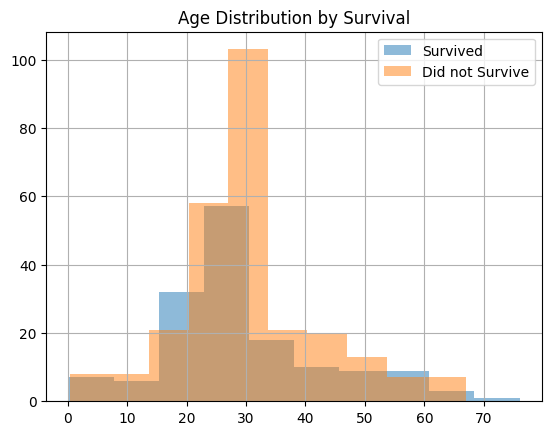

In [22]:
import matplotlib.pyplot as plt

df_selected[df_selected['Survived'] == 1]['Age'].hist(alpha=0.5, label='Survived')
df_selected[df_selected['Survived'] == 0]['Age'].hist(alpha=0.5, label='Did not Survive')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

**21. Обчисліть відсоток виживання для кожної комбінації статі та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі).**

In [26]:
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print(survival_by_sex_class)
print(survival_by_sex_class.idxmax())

Sex     Pclass
female  1         100.0
        2         100.0
        3         100.0
male    1           0.0
        2           0.0
        3           0.0
Name: Survived, dtype: float64
('female', 1)


**22.Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare).**

In [27]:
correlation_matrix = df_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print(correlation_matrix)

          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


**Висновок**

В ході виконання даного завдання проаналізовано дані Титаніка. Виявлено та замінено пропущені значення в деяких стовпцях, аби забезпечити коректний подальший аналіз. Також, було виявлено високу залежність виживання від статі та класу.